# Machine Learning - Caso de Estudio I

Reconocer los datos de análisis para el caso de estudio, si se trata de aprendizaje sobre imágenes (clasificación), aprendizaje sobre texto (clasificación), sobre variables continuas y discretas (regresión o clasificación).

## Fase 1 - Estructurar el Conjunto de Datos

- Adquisición de Datos
- Exploración de Datos
- Preprocesamiento

### Adquisición de Datos

In [1]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/dragonnomada/ml-2023/main/datasets/ds_salaries.csv")

data.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1940,2022,SE,FT,Data Engineer,70000,EUR,73546,ES,0,ES,M
2581,2022,SE,FT,Data Engineer,184100,USD,184100,US,0,US,M
1726,2023,SE,FT,Data Engineer,65000,EUR,69751,PT,0,PT,M
995,2023,SE,FT,Machine Learning Engineer,204500,USD,204500,US,0,US,M
3172,2022,SE,FT,Data Engineer,175000,USD,175000,US,100,US,M


### Exploración de Datos

In [6]:
data["work_year"].sort_values().unique()

array([2020, 2021, 2022, 2023])

In [9]:
data["count"] = 1

data.groupby("work_year").count()["count"]

work_year
2020      76
2021     230
2022    1664
2023    1785
Name: count, dtype: int64

In [15]:
data["count"] = 1

counts = data.groupby("work_year").count()["count"]

years = list(counts.index)
year_weights = list(counts.values)

print(years)
print(year_weights)

[2020, 2021, 2022, 2023]
[76, 230, 1664, 1785]


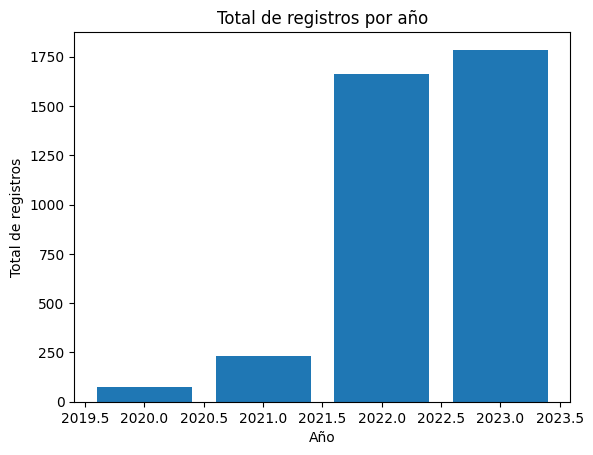

In [17]:
import matplotlib.pyplot as plt

plt.bar(years, year_weights)

plt.title("Total de registros por año")

plt.xlabel("Año")

plt.ylabel("Total de registros")

plt.show()

In [18]:
data["experience_level"].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [19]:
data["count"] = 1

counts = data.groupby("experience_level").count()["count"]

exp_levels = list(counts.index)
exp_level_weights = list(counts.values)

print(exp_levels)
print(exp_level_weights)

['EN', 'EX', 'MI', 'SE']
[320, 114, 805, 2516]


In [22]:
exp_level_weights[3] / sum(exp_level_weights) * 100

67.0039946737683

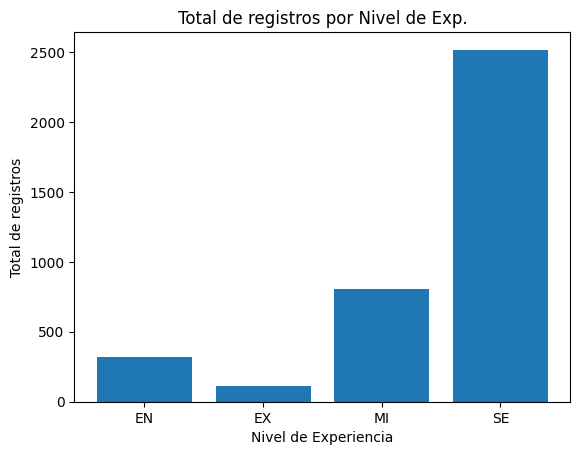

In [23]:
plt.bar(exp_levels, exp_level_weights)

plt.title("Total de registros por Nivel de Exp.")

plt.xlabel("Nivel de Experiencia")
plt.ylabel("Total de registros")

plt.show()

In [24]:
def viz_total_registros(columna):
  data["count"] = 1
  counts = data.groupby(columna).count()["count"]
  labels = list(counts.index)
  totals = list(counts.values)
  print("Labels=", labels)
  print("Totals=", totals)
  plt.bar(labels, totals)
  plt.title(f"Total de registros de {columna}")
  plt.xlabel(columna)
  plt.ylabel("Total de registros")
  plt.show()
  return labels, totals

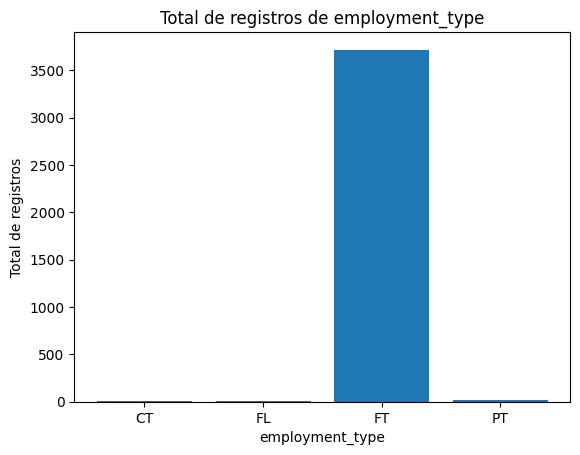

(['CT', 'FL', 'FT', 'PT'], [10, 10, 3718, 17])

In [25]:
viz_total_registros("employment_type")

In [ ]:
viz_total_registros("employment_type")

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
 11  count               3755 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 352.2+ KB


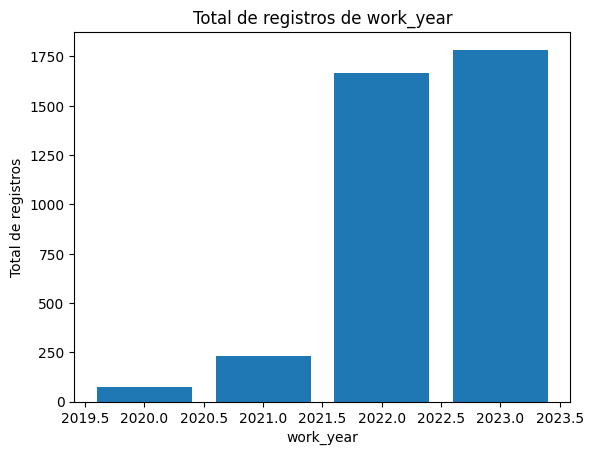

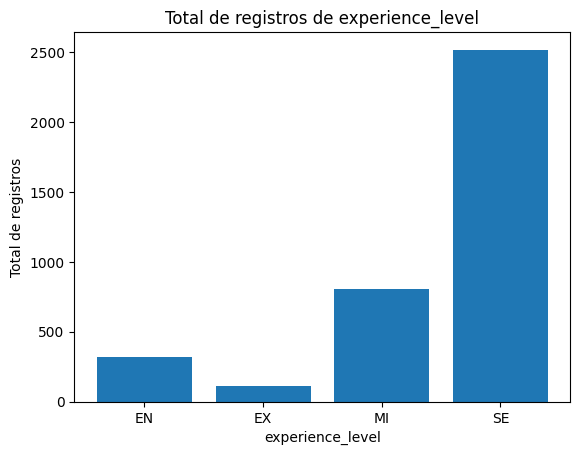

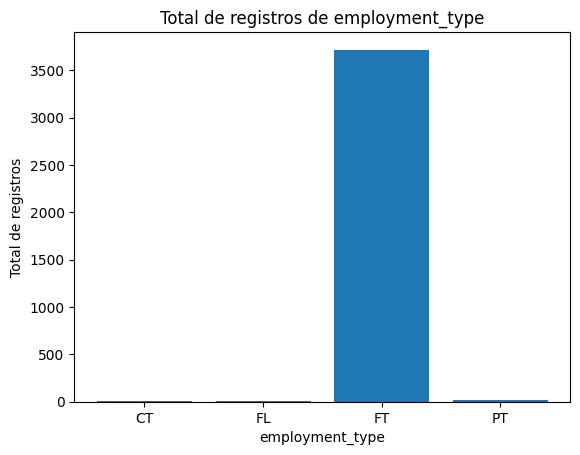

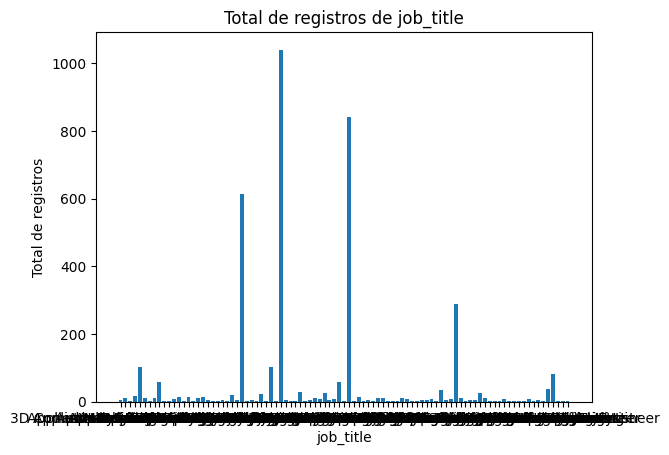

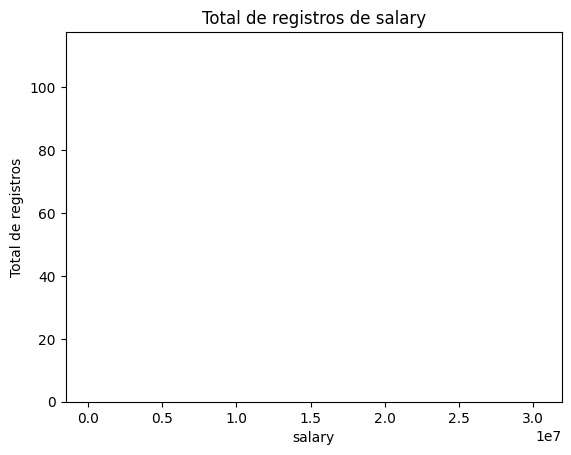

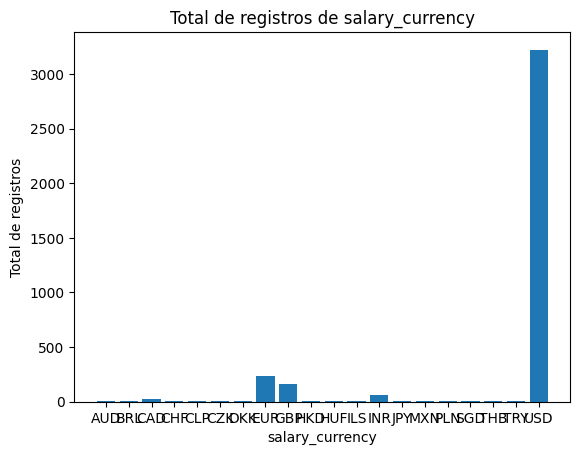

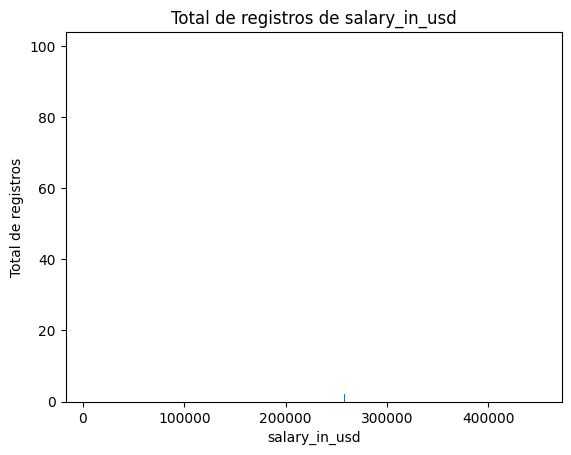

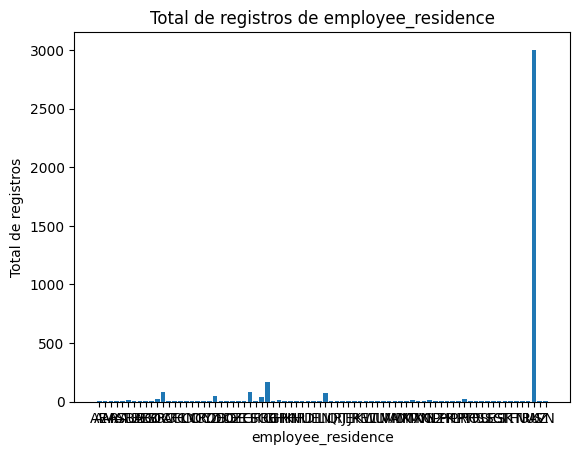

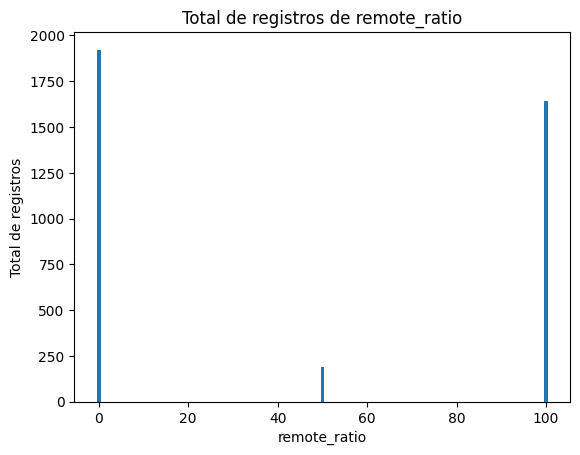

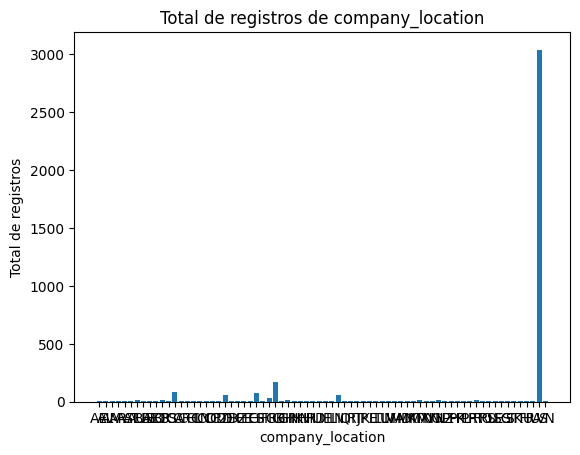

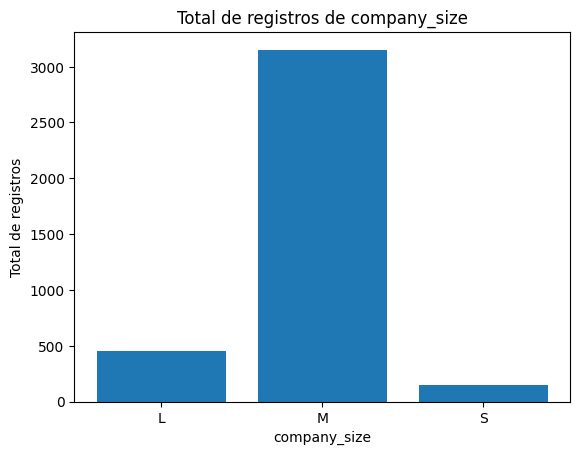

In [44]:
for columna in data.columns:
  if columna == "count":
    continue
  viz_total_registros(columna)

In [36]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'count'],
      dtype='object')

### Preprocesamiento

In [78]:
data_study = data.copy()

data_study = data_study[
    (data_study["work_year"] == 2022) |
     (data_study["work_year"] == 2023) ]

data_study = data_study[ (data_study["experience_level"] == "SE") ]

data_study = data_study[ (data_study["employment_type"] == "FT") ]

data_study = data_study[
    (data_study["remote_ratio"] == 0) |
     (data_study["remote_ratio"] == 100) ]

data_study = data_study[ (data_study["salary_currency"] == "USD") ]

data_study = data_study[ (data_study["company_size"] == "M") ]

data_study = data_study[ (data_study["employee_residence"] == "US") ]

data_study["remote_ratio"] = data_study["remote_ratio"] / 100

data_study["work_year"] = data_study["work_year"] - 2022

job_titles = list(data_study["job_title"].unique())

# data_study["job_title_index"] = data_study["job_title"].map(lambda job: job_titles.index(job))

for job in job_titles:
  data_study[job] = data_study["job_title"] == job
  data_study[job] = data_study[job].map(int)

data_study = data_study[["work_year", "job_title", "salary_in_usd", "remote_ratio"] + job_titles]

data_study.sample(10)

,work_year,job_title,salary_in_usd,remote_ratio,Data Scientist,Data Analyst,Data Modeler,Business Intelligence Engineer,Machine Learning Engineer,Data Engineer,...,Data Science Consultant,Data Lead,Data Science Engineer,Cloud Database Engineer,NLP Engineer,Applied Machine Learning Scientist,Data Specialist,Data Operations Analyst,Machine Learning Manager,ETL Developer
1183,1,Data Analyst,169000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
839,1,Machine Learning Engineer,153400,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1170,1,Data Scientist,156400,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2485,0,Data Analyst,100000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1781,1,Applied Scientist,142000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193,1,Data Scientist,186000,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2296,0,Data Analyst,177000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2283,0,Data Scientist,168000,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1398,1,Applied Scientist,205000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
413,1,Data Scientist,191765,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
len(data_study) / len(data) * 100

55.233022636484684

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

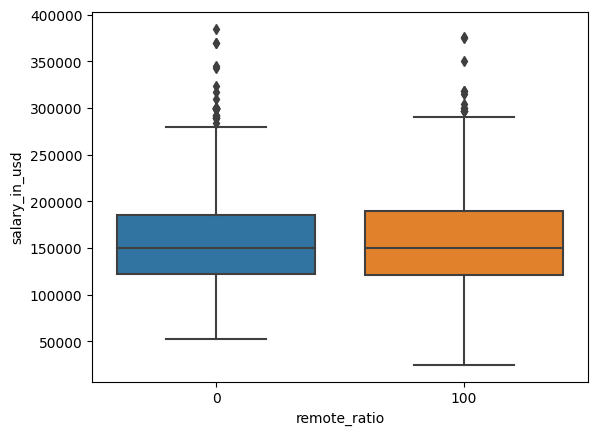

In [62]:
import seaborn as sns
sns.boxplot(x=data_study["remote_ratio"], y=data_study["salary_in_usd"])

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

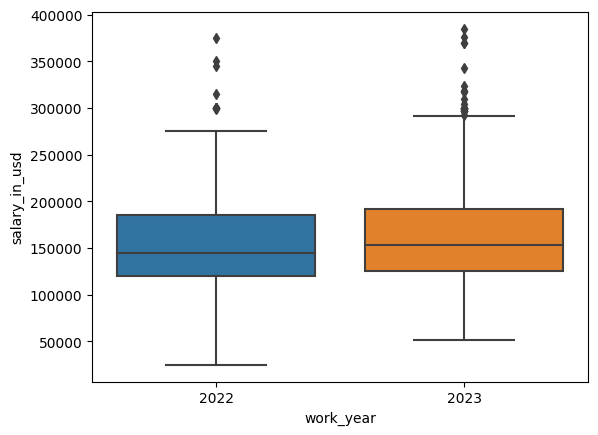

In [63]:
sns.boxplot(x=data_study["work_year"], y=data_study["salary_in_usd"])

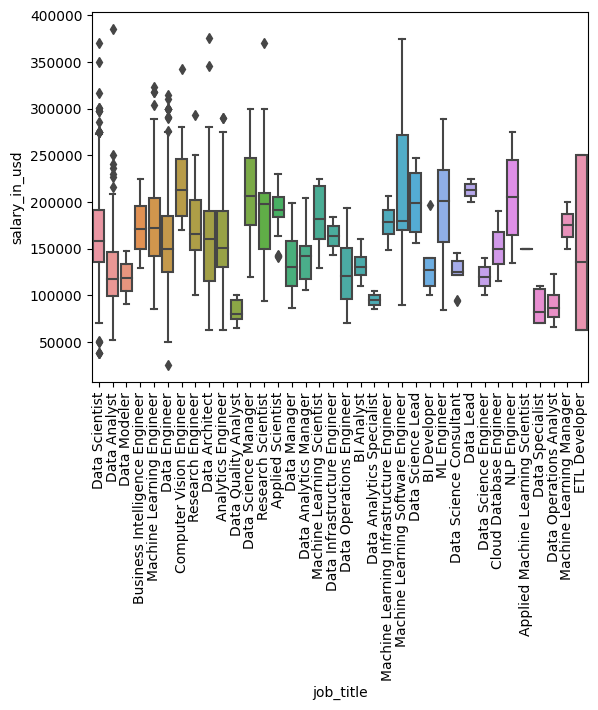

In [66]:
sns.boxplot(x=data_study["job_title"], y=data_study["salary_in_usd"])
plt.xticks(rotation=90)
plt.show()

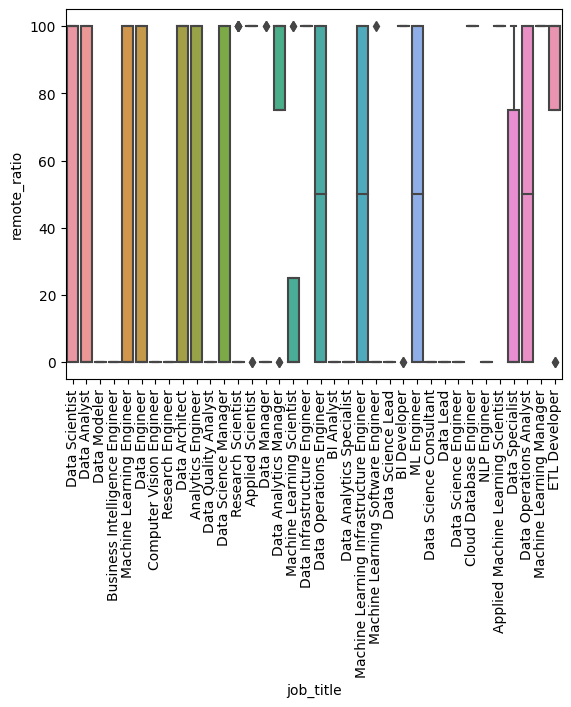

In [69]:
sns.boxplot(x=data_study["job_title"], y=data_study["remote_ratio"])
plt.xticks(rotation=90)
plt.show()

## Fase 2 - Modelo de Aprendizaje

- Conjunto de Entrenamiento
- Conjunto de Pruebas
- Modelo de Clasificación/Regresión
- Ajuste/Entrenamiento
- Pruebas de Validación

In [79]:
data_study.columns

Index(['work_year', 'job_title', 'salary_in_usd', 'remote_ratio',
       'Data Scientist', 'Data Analyst', 'Data Modeler',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Engineer', 'Computer Vision Engineer', 'Research Engineer',
       'Data Architect', 'Analytics Engineer', 'Data Quality Analyst',
       'Data Science Manager', 'Research Scientist', 'Applied Scientist',
       'Data Manager', 'Data Analytics Manager', 'Machine Learning Scientist',
       'Data Infrastructure Engineer', 'Data Operations Engineer',
       'BI Analyst', 'Data Analytics Specialist',
       'Machine Learning Infrastructure Engineer',
       'Machine Learning Software Engineer', 'Data Science Lead',
       'BI Developer', 'ML Engineer', 'Data Science Consultant', 'Data Lead',
       'Data Science Engineer', 'Cloud Database Engineer', 'NLP Engineer',
       'Applied Machine Learning Scientist', 'Data Specialist',
       'Data Operations Analyst', 'Machine Learning Manager

In [80]:
data_study.values

array([[1, 'Data Scientist', 147100, ..., 0, 0, 0],
       [1, 'Data Scientist', 90700, ..., 0, 0, 0],
       [1, 'Data Analyst', 130000, ..., 0, 0, 0],
       ...,
       [0, 'Data Engineer', 115000, ..., 0, 0, 0],
       [0, 'Data Scientist', 165000, ..., 0, 0, 0],
       [0, 'Data Science Manager', 152500, ..., 0, 0, 0]], dtype=object)

In [82]:
X = data_study[["work_year", "remote_ratio"] + job_titles].values
X

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [84]:
y = data_study["salary_in_usd"].values
y

array([147100,  90700, 130000, ..., 115000, 165000, 152500])

In [85]:
X.shape, y.shape

((2074, 38), (2074,))

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1659, 38), (415, 38), (1659,), (415,))

In [88]:
from sklearn.linear_model import LinearRegression

reg1 = LinearRegression()

reg1.fit(X_train, y_train)

reg1.score(X_test, y_test)

-3.52364941395571e+20

In [89]:
from sklearn.svm import SVR

reg2 = SVR()

reg2.fit(X_train, y_train)

reg2.score(X_test, y_test)

-0.0166597316670416

In [90]:
X = data_study[ ["work_year"] + job_titles ].values
y = data_study["remote_ratio"].values

In [92]:
X.shape, y.shape

((2074, 37), (2074,))

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1659, 37), (415, 37), (1659,), (415,))

In [99]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV()

clf.fit(X_train, y_train)

clf.score(X_test, y_test) * 100

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

67.95180722891565

In [97]:
from sklearn.linear_model import Perceptron

clf = Perceptron()

clf.fit(X_train, y_train)

clf.score(X_test, y_test) * 100

44.81927710843374

In [98]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

clf.score(X_test, y_test) * 100

67.71084337349397

## Fase 3 - Reportes y Resultados

- Validación de Aprendizaje
- Generar gráficas de desempeño
- Reporte de Métricas

In [100]:
len(X[0])

37

In [104]:
import numpy as np

clf.predict([
    [0, 1] + list(np.zeros(35)),
    [0] + list(np.zeros(15)) + [1] + list(np.zeros(20)),
    [1, 1] + list(np.zeros(35)),
    [1] + list(np.zeros(15)) + [1] + list(np.zeros(20)),
])

array([1., 1., 0., 1.])

In [105]:
job_titles[0], job_titles[16]

('Data Scientist', 'Machine Learning Scientist')